Matplotlib is building the font cache; this may take a moment.


TASK 1: LOAD AND EXPLORE THE DATASET
Dataset loaded successfully!
Dataset shape: (150, 5)

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal leng

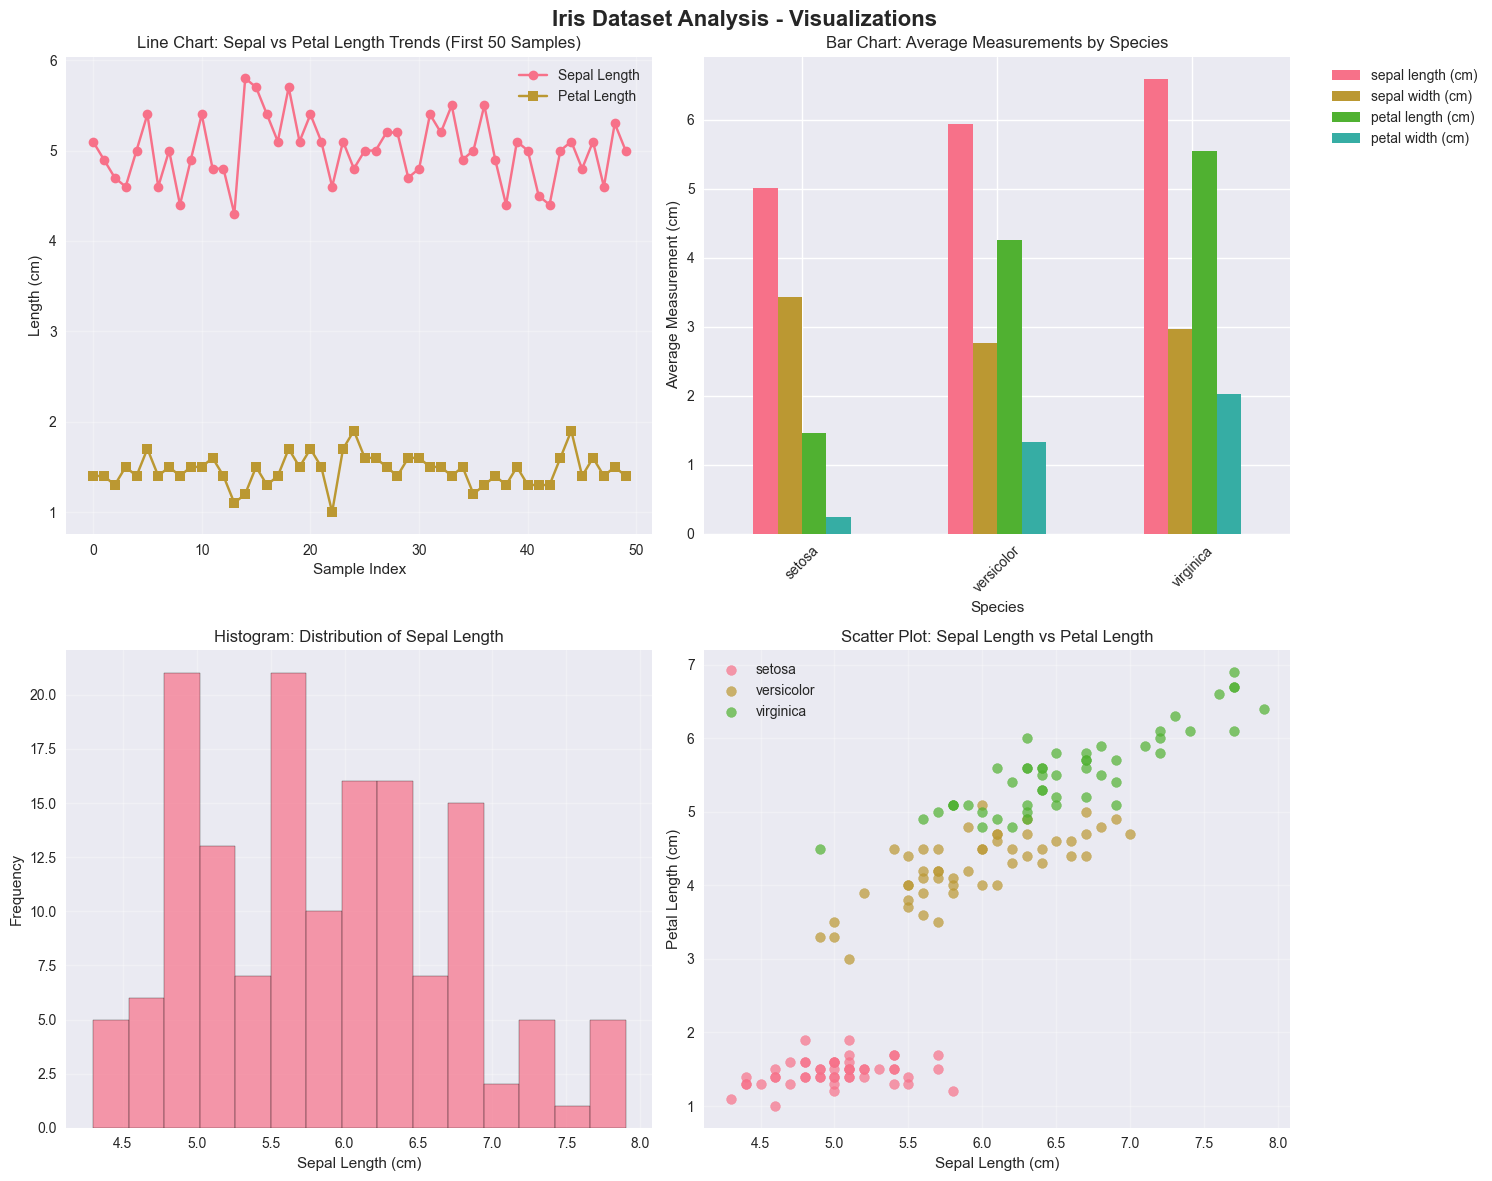


Creating additional visualizations...


<Figure size 1200x600 with 0 Axes>

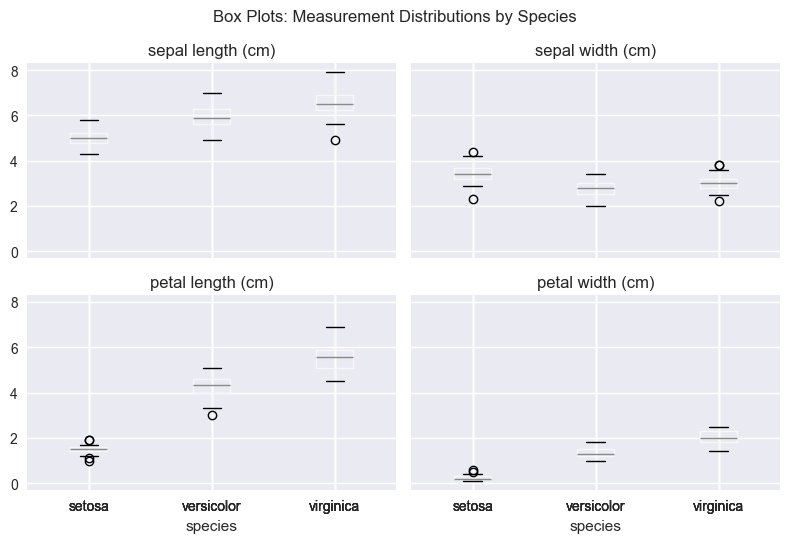

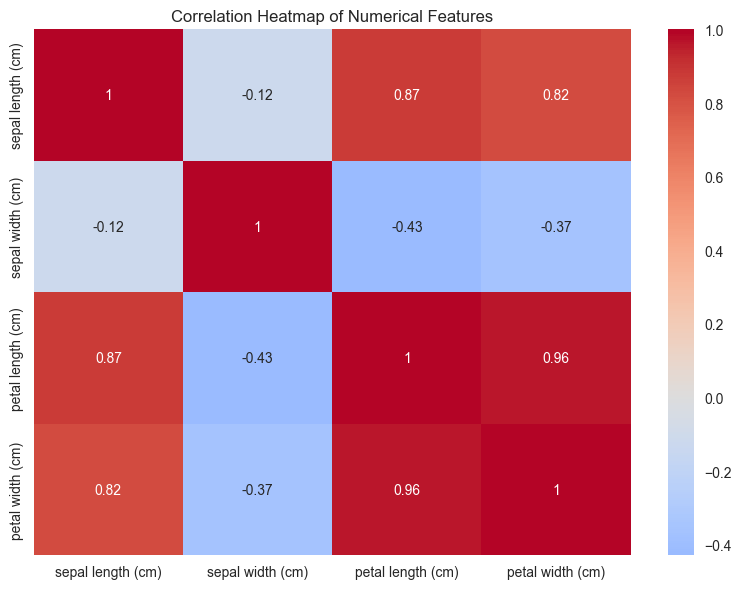

Creating Pairplot (this may take a moment)...


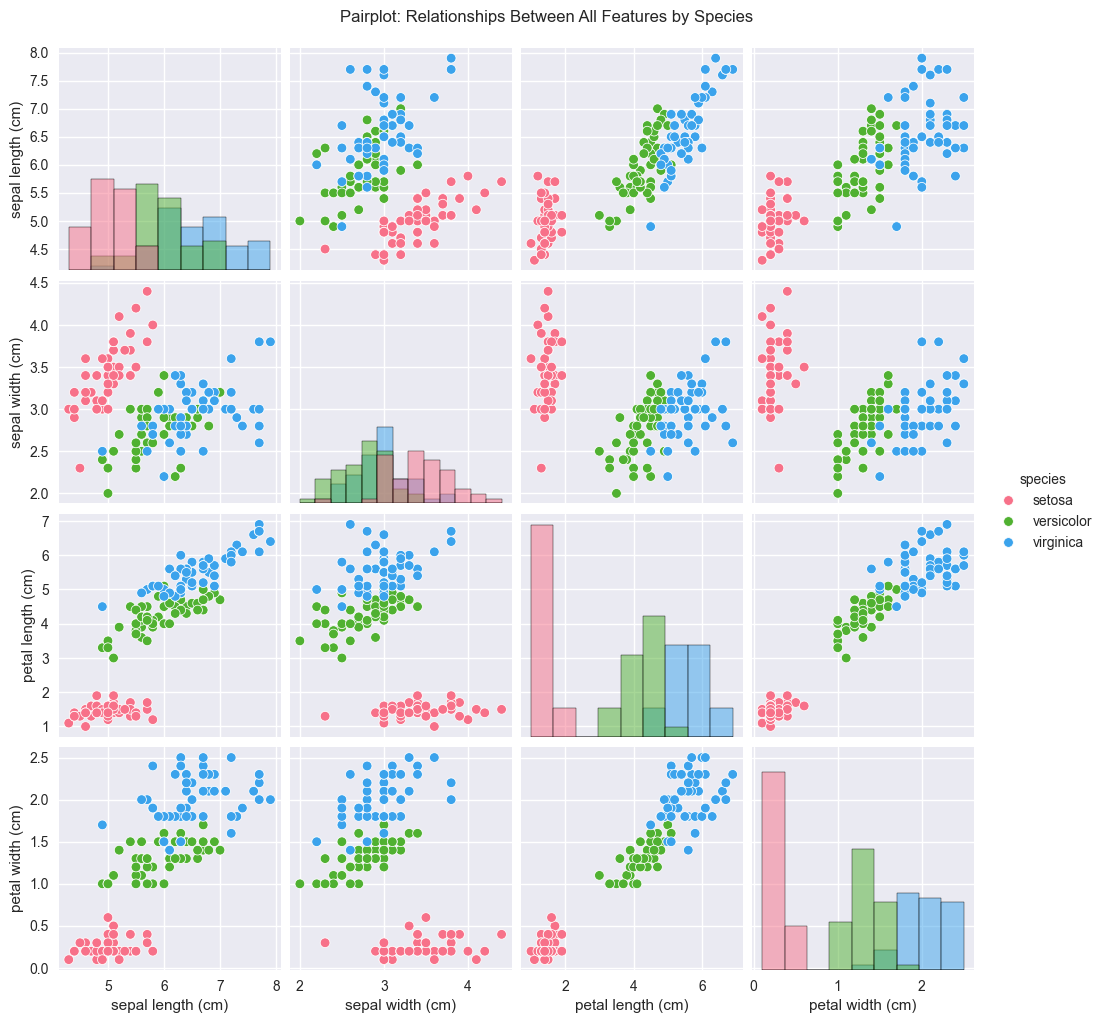


ANALYSIS COMPLETE!
Key observations from visualizations:
1. Clear separation between species in scatter plots
2. Strong correlation between petal length and petal width
3. Setosa has distinct characteristics from other species
4. Virginica tends to have the largest measurements overall


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import numpy as np

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Task 1: Load and Explore the Dataset
print("="*50)
print("TASK 1: LOAD AND EXPLORE THE DATASET")
print("="*50)

try:
    # Load the Iris dataset
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
    
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    
    # Display first few rows
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    
    # Explore data structure
    print("\nDataset information:")
    print(df.info())
    
    # Check for missing values
    print("\nMissing values in each column:")
    print(df.isnull().sum())
    
    # Clean dataset (though Iris dataset typically has no missing values)
    if df.isnull().sum().sum() > 0:
        df = df.dropna()
        print("\nMissing values dropped.")
    else:
        print("\nNo missing values found. Dataset is clean.")
        
except Exception as e:
    print(f"Error loading dataset: {e}")

# Task 2: Basic Data Analysis
print("\n" + "="*50)
print("TASK 2: BASIC DATA ANALYSIS")
print("="*50)

# Basic statistics
print("Basic statistics for numerical columns:")
print(df.describe())

# Group by species and compute means
print("\nMean values by species:")
species_means = df.groupby('species').mean()
print(species_means)

# Additional analysis
print("\nStandard deviation by species:")
species_std = df.groupby('species').std()
print(species_std)

# Interesting findings
print("\n" + "="*50)
print("INTERESTING FINDINGS:")
print("="*50)
print("1. Setosa species has significantly smaller petal measurements")
print("2. Virginica has the largest sepal length on average")
print("3. Versicolor falls in between setosa and virginica in most measurements")
print("4. Sepal width shows less variation across species compared to other features")

# Task 3: Data Visualization
print("\n" + "="*50)
print("TASK 3: DATA VISUALIZATION")
print("="*50)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Iris Dataset Analysis - Visualizations', fontsize=16, fontweight='bold')

# 1. Line chart (simulating trends - since Iris doesn't have time data, we'll use index)
print("\nCreating Line Chart...")
axes[0, 0].plot(df.index[:50], df['sepal length (cm)'][:50], label='Sepal Length', marker='o')
axes[0, 0].plot(df.index[:50], df['petal length (cm)'][:50], label='Petal Length', marker='s')
axes[0, 0].set_title('Line Chart: Sepal vs Petal Length Trends (First 50 Samples)')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Length (cm)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Bar chart - average measurements by species
print("Creating Bar Chart...")
species_means.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Bar Chart: Average Measurements by Species')
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Average Measurement (cm)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Histogram - distribution of sepal length
print("Creating Histogram...")
axes[1, 0].hist(df['sepal length (cm)'], bins=15, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Histogram: Distribution of Sepal Length')
axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 4. Scatter plot - sepal length vs petal length
print("Creating Scatter Plot...")
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for species in df['species'].unique():
    subset = df[df['species'] == species]
    axes[1, 1].scatter(subset['sepal length (cm)'], subset['petal length (cm)'], 
                      label=species, alpha=0.7, s=50)
axes[1, 1].set_title('Scatter Plot: Sepal Length vs Petal Length')
axes[1, 1].set_xlabel('Sepal Length (cm)')
axes[1, 1].set_ylabel('Petal Length (cm)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional visualizations for better insights
print("\nCreating additional visualizations...")

# Box plot to show distribution by species
plt.figure(figsize=(12, 6))
df.boxplot(by='species', column=['sepal length (cm)', 'sepal width (cm)', 
                                'petal length (cm)', 'petal width (cm)'])
plt.suptitle('Box Plots: Measurement Distributions by Species')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Pairplot for comprehensive view
print("Creating Pairplot (this may take a moment)...")
sns.pairplot(df, hue='species', diag_kind='hist', palette='husl')
plt.suptitle('Pairplot: Relationships Between All Features by Species', y=1.02)
plt.show()

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)
print("Key observations from visualizations:")
print("1. Clear separation between species in scatter plots")
print("2. Strong correlation between petal length and petal width")
print("3. Setosa has distinct characteristics from other species")
print("4. Virginica tends to have the largest measurements overall")